## Case studies using different data sets

### Read Data

In [1]:
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
import numpy as np
import datetime,time
%matplotlib inline

In [11]:
workingPath = r"C:\Users\Fan\OneDrive - tongji.edu.cn\Project_in_UA\Fan' file\2_UA_Project\ProjectFenestration\2_Model\Control_Oriented_Model\Data"

# January
workingPath_Jan = r"C:\Users\Fan\OneDrive - tongji.edu.cn\Project_in_UA\Fan' file\2_UA_Project\ProjectFenestration\2_Model\Control_Oriented_Model\Data\Jan_Case"

# July
workingPath_July = r"C:\Users\Fan\OneDrive - tongji.edu.cn\Project_in_UA\Fan' file\2_UA_Project\ProjectFenestration\2_Model\Control_Oriented_Model\Data\July_Case"

In [6]:
FileName = []
FileName.append("Cor_Month.csv")
FileName.append("Sou_Month.csv")
FileName.append("Nor_Month.csv")
FileName.append("Wes_Month.csv")
FileName.append("Eas_Month.csv")

#### Read data

In [7]:
Data_Jan= {}
Data_Jan['Cor'] = pd.read_csv(workingPath_Jan+"\\"+FileName[0],parse_dates =[0],
                              date_parser=lambda x:time.strftime("%Y-%m-%d %H:%M:%S",time.gmtime(float(x))),index_col=[0])
Data_Jan['Sou'] = pd.read_csv(workingPath_Jan+"\\"+FileName[1],parse_dates =[0],
                              date_parser=lambda x:time.strftime("%Y-%m-%d %H:%M:%S",time.gmtime(float(x))),index_col=[0])
Data_Jan['Nor'] = pd.read_csv(workingPath_Jan+"\\"+FileName[2],parse_dates =[0],
                              date_parser=lambda x:time.strftime("%Y-%m-%d %H:%M:%S",time.gmtime(float(x))),index_col=[0])
Data_Jan['Wes'] = pd.read_csv(workingPath_Jan+"\\"+FileName[3],parse_dates =[0],
                              date_parser=lambda x:time.strftime("%Y-%m-%d %H:%M:%S",time.gmtime(float(x))),index_col=[0])
Data_Jan['Eas'] = pd.read_csv(workingPath_Jan+"\\"+FileName[4],parse_dates =[0],
                              date_parser=lambda x:time.strftime("%Y-%m-%d %H:%M:%S",time.gmtime(float(x))),index_col=[0])

In [137]:
Data_Jan= {}
Data_Jan['Cor'] = pd.read_csv(workingPath_July+"\\"+FileName[0],parse_dates =[0],
                              date_parser=lambda x:time.strftime("%Y-%m-%d %H:%M:%S",time.gmtime(float(x))),index_col=[0])
Data_Jan['Sou'] = pd.read_csv(workingPath_July+"\\"+FileName[1],parse_dates =[0],
                              date_parser=lambda x:time.strftime("%Y-%m-%d %H:%M:%S",time.gmtime(float(x))),index_col=[0])
Data_Jan['Nor'] = pd.read_csv(workingPath_July+"\\"+FileName[2],parse_dates =[0],
                              date_parser=lambda x:time.strftime("%Y-%m-%d %H:%M:%S",time.gmtime(float(x))),index_col=[0])
Data_Jan['Wes'] = pd.read_csv(workingPath_July+"\\"+FileName[3],parse_dates =[0],
                              date_parser=lambda x:time.strftime("%Y-%m-%d %H:%M:%S",time.gmtime(float(x))),index_col=[0])
Data_Jan['Eas'] = pd.read_csv(workingPath_July+"\\"+FileName[4],parse_dates =[0],
                              date_parser=lambda x:time.strftime("%Y-%m-%d %H:%M:%S",time.gmtime(float(x))),index_col=[0])

In [11]:
Data_Jan['Eas'].head()

,TSupEas.T,flo.temAirEas.T,VSupEas_flow.V_flow
Time,,,
1970-01-01 00:00:00,293.150,293.150,2.560000e-13
1970-01-01 00:00:05,293.189,293.130,2.299930e-04
1970-01-01 00:00:05,293.189,293.130,2.299930e-04
1970-01-01 00:00:18,293.290,293.081,2.298680e-04
1970-01-01 00:00:18,293.290,293.081,2.298680e-04


In [8]:
Data_Jan_Resampled = {}
for idx, value in Data_Jan.items():
    ## drop duplciates, and back fill nan
    Data_Jan_Resampled[idx] = value.drop_duplicates().bfill()
    Data_Jan_Resampled[idx] = Data_Jan[idx].iloc[0:1,:].append(Data_Jan[idx].iloc[1:,:].resample("10s",label ="right").mean()).bfill()  

In [9]:
Data_Jan['Cor'].head()

,TSupCor.T,flo.temAirPer5.T,VSupCor_flow.V_flow
Time,,,
1970-01-01 00:00:00,293.150,293.150,1.280000e-12
1970-01-01 00:00:05,293.189,293.151,1.148860e-03
1970-01-01 00:00:05,293.189,293.151,1.148860e-03
1970-01-01 00:00:18,293.290,293.152,1.148240e-03
1970-01-01 00:00:18,293.290,293.152,1.148240e-03


In [ ]:
Data_Jan['Nor'].head()

In [ ]:
Data_Jan['Sou'].head()

In [ ]:
Data_Jan['Eas'].head()

In [ ]:
Data_Jan['Wes'].head()

#### Read Weather Data

In [12]:
Weather_Data = pd.read_csv(workingPath+"\\WeatherData.csv",index_col=0,parse_dates = True)
Weather_Data.head()

,Dry Bulb Temperature {C},Dew Point Temperature {C},Relative Humidity {%},Atmospheric Pressure {Pa},Extraterrestrial Horizontal Radiation {Wh/m2},Extraterrestrial Direct Normal Radiation {Wh/m2},Horizontal Infrared Radiation Intensity from Sky {Wh/m2},Global Horizontal Radiation {Wh/m2},Direct Normal Radiation {Wh/m2},Diffuse Horizontal Radiation {Wh/m2}
Date,,,,,,,,,,
1970-01-01 00:00:00,-12.2,-16.1,73,99500,0,0,218,0,0,0
1970-01-01 01:00:00,-11.7,-15.6,73,99600,0,0,227,0,0,0
1970-01-01 02:00:00,-11.1,-15.0,73,99500,0,0,230,0,0,0
1970-01-01 03:00:00,-11.1,-15.0,73,99500,0,0,230,0,0,0
1970-01-01 04:00:00,-10.6,-14.4,73,99500,0,0,232,0,0,0


In [13]:
Weather_Data_resampled = Weather_Data.resample("10s").ffill()
Weather_Data_resampled.head()

,Dry Bulb Temperature {C},Dew Point Temperature {C},Relative Humidity {%},Atmospheric Pressure {Pa},Extraterrestrial Horizontal Radiation {Wh/m2},Extraterrestrial Direct Normal Radiation {Wh/m2},Horizontal Infrared Radiation Intensity from Sky {Wh/m2},Global Horizontal Radiation {Wh/m2},Direct Normal Radiation {Wh/m2},Diffuse Horizontal Radiation {Wh/m2}
Date,,,,,,,,,,
1970-01-01 00:00:00,-12.2,-16.1,73,99500,0,0,218,0,0,0
1970-01-01 00:00:10,-12.2,-16.1,73,99500,0,0,218,0,0,0
1970-01-01 00:00:20,-12.2,-16.1,73,99500,0,0,218,0,0,0
1970-01-01 00:00:30,-12.2,-16.1,73,99500,0,0,218,0,0,0
1970-01-01 00:00:40,-12.2,-16.1,73,99500,0,0,218,0,0,0


## Construct ARX models

### Feature Generation

In [14]:
from statsmodels.tools import add_constant 

In [15]:
## History_Record data
def History_Record_Data(y_Sequence_Updated,time_lags):    
    result = pd.concat(map(lambda x:y_Sequence_Updated.shift(x),time_lags),axis = 1)
    result.columns = ['hist_{}'.format(x) for x in time_lags]
    return result

In [16]:
def TimeInterval_Parser(TimeInterval):
    unit = TimeInterval[-1]
    if unit.upper() == "S":
        return int(TimeInterval[:-1])
    elif unit.upper() == "T":
        return int(TimeInterval[:-1])*60
    elif unit.upper() == "H":
        return int(TimeInterval[:-1])*3600
    else:
        return False

In [17]:
def pre_Process(data_with_Timestamps_resampled,Weather_Data_resampled,TimeInterval,time_lags):
    data_with_Timestamps_resampled_After = data_with_Timestamps_resampled.resample(TimeInterval).mean()
    dataset_Hist = History_Record_Data(data_with_Timestamps_resampled_After.iloc[:,1:2],time_lags)

    length = data_with_Timestamps_resampled_After.shape[0]

    ## Occupant
    a = ((data_with_Timestamps_resampled_After.index.hour >=6)+0).reshape(-1,1)
    b  = ((data_with_Timestamps_resampled_After.index.hour<=19)+0).reshape(-1,1)
    occupied_OrNot = pd.DataFrame(a*b,columns = ['occup'],index = data_with_Timestamps_resampled_After.index)
    
    n = int(3600/TimeInterval_Parser(TimeInterval))

    # Equipment and Lighting schedule

    ## This is how Internal heat gain defined in modelica
    define_matrix = [[0,0.05],[8,0.05],[9,0.9],[12,0.9],[12,0.8],[13,0.8],[13,1],[17,1],[19,0.1],[24,0.05]] 
    InternalGain = []
    for i,ele in enumerate(define_matrix[:-1]):
        if (define_matrix[i][0] - define_matrix[i+1][0])==0: #
            continue
        else:
            if (define_matrix[i+1][1] - define_matrix[i][1]) == 0:
                temp = [define_matrix[i+1][1]]*(define_matrix[i+1][0] - define_matrix[i][0])*n
                InternalGain = InternalGain + temp
            else:
                temp = np.arange(define_matrix[i][1],define_matrix[i+1][1],(define_matrix[i+1][1] - define_matrix[i][1])/(define_matrix[i+1][0] - define_matrix[i][0])/n).tolist()
                InternalGain = InternalGain + temp
    plt.plot(InternalGain,)
    plt.title('InternalGain')

    InternGain_All =  pd.DataFrame((InternalGain *(int(length/len(InternalGain))+1))[:length],
                                   columns = ['InternalGain'],index = data_with_Timestamps_resampled_After.index)
    
    # Weather data
    Weather_Data_resampled_After = Weather_Data_resampled.resample(TimeInterval).mean()
    Weather_Data_resampled_After.head()
    

    # prepare dateset

    ## Add Constant
    dataSet_MLR = add_constant(data_with_Timestamps_resampled_After.iloc[:,[0,2]].join(dataset_Hist).join(occupied_OrNot).join(
            InternGain_All).join(Weather_Data_resampled_After))
    
    dataSetX_All,dataSetY_All = dataSet_MLR.iloc[max(time_lags):,:],data_with_Timestamps_resampled_After.iloc[max(time_lags):,1:2]
    return dataSetX_All, dataSetY_All

In [18]:
## Some Global Variables

## You need to specify these three parameters everytime!!!
TimeInterval = '10T' # 10 mins
PredictionHorizon = "6H"
time_lags = [1,2,3,4,5,6,12,18,36,72,144]

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is dep

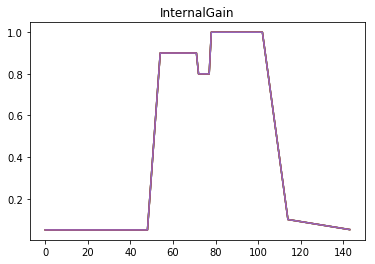

In [19]:
dataSetX_All = {}
dataSetY_All = {}
for idx, value in Data_Jan_Resampled.items():
    dataSetX_All[idx],dataSetY_All[idx] = pre_Process(value,Weather_Data_resampled,TimeInterval,time_lags)

In [24]:
dataSetX_All[idx].head()

,const,TSupEas.T,VSupEas_flow.V_flow,hist_1,hist_2,hist_3,hist_4,hist_5,hist_6,hist_12,...,Dry Bulb Temperature {C},Dew Point Temperature {C},Relative Humidity {%},Atmospheric Pressure {Pa},Extraterrestrial Horizontal Radiation {Wh/m2},Extraterrestrial Direct Normal Radiation {Wh/m2},Horizontal Infrared Radiation Intensity from Sky {Wh/m2},Global Horizontal Radiation {Wh/m2},Direct Normal Radiation {Wh/m2},Diffuse Horizontal Radiation {Wh/m2}
Time,,,,,,,,,,,,,,,,,,,,,
1970-01-02 00:00:00,1.0,322.085533,0.000180,294.581833,294.609433,294.637033,294.665567,294.695733,294.729400,294.985567,...,-3.9,-6.1,85,99000,0,0,237,0,0,0
1970-01-02 00:10:00,1.0,322.206000,0.000181,294.553933,294.581833,294.609433,294.637033,294.665567,294.695733,294.939033,...,-3.9,-6.1,85,99000,0,0,237,0,0,0
1970-01-02 00:20:00,1.0,322.313400,0.000182,294.524333,294.553933,294.581833,294.609433,294.637033,294.665567,294.894733,...,-3.9,-6.1,85,99000,0,0,237,0,0,0
1970-01-02 00:30:00,1.0,322.407567,0.000170,294.491933,294.524333,294.553933,294.581833,294.609433,294.637033,294.851533,...,-3.9,-6.1,85,99000,0,0,237,0,0,0
1970-01-02 00:40:00,1.0,322.481067,0.000144,294.459567,294.491933,294.524333,294.553933,294.581833,294.609433,294.809200,...,-3.9,-6.1,85,99000,0,0,237,0,0,0


### Colinearity removal

In [20]:
from scipy.stats import pearsonr

In [21]:
featureSet_Cor = ['const', 'TSupCor.T', 'VSupCor_flow.V_flow', 'occup', 'InternalGain',
       'Dry Bulb Temperature {C}', 'Dew Point Temperature {C}',
       'Relative Humidity {%}', 'Atmospheric Pressure {Pa}',
       'Extraterrestrial Horizontal Radiation {Wh/m2}',
       'Extraterrestrial Direct Normal Radiation {Wh/m2}',
       'Horizontal Infrared Radiation Intensity from Sky {Wh/m2}',
       'Global Horizontal Radiation {Wh/m2}',
       'Direct Normal Radiation {Wh/m2}',
       'Diffuse Horizontal Radiation {Wh/m2}']
featureSet_Nor = ['const', 'TSupNor.T', 'VSupNor_flow.V_flow', 'occup', 'InternalGain',
       'Dry Bulb Temperature {C}', 'Dew Point Temperature {C}',
       'Relative Humidity {%}', 'Atmospheric Pressure {Pa}',
       'Extraterrestrial Horizontal Radiation {Wh/m2}',
       'Extraterrestrial Direct Normal Radiation {Wh/m2}',
       'Horizontal Infrared Radiation Intensity from Sky {Wh/m2}',
       'Global Horizontal Radiation {Wh/m2}',
       'Direct Normal Radiation {Wh/m2}',
       'Diffuse Horizontal Radiation {Wh/m2}']
featureSet_Sou = ['const', 'TSupSou.T', 'VSupSou_flow.V_flow', 'occup', 'InternalGain',
       'Dry Bulb Temperature {C}', 'Dew Point Temperature {C}',
       'Relative Humidity {%}', 'Atmospheric Pressure {Pa}',
       'Extraterrestrial Horizontal Radiation {Wh/m2}',
       'Extraterrestrial Direct Normal Radiation {Wh/m2}',
       'Horizontal Infrared Radiation Intensity from Sky {Wh/m2}',
       'Global Horizontal Radiation {Wh/m2}',
       'Direct Normal Radiation {Wh/m2}',
       'Diffuse Horizontal Radiation {Wh/m2}']
featureSet_Eas = ['const', 'TSupEas.T', 'VSupEas_flow.V_flow', 'occup', 'InternalGain',
       'Dry Bulb Temperature {C}', 'Dew Point Temperature {C}',
       'Relative Humidity {%}', 'Atmospheric Pressure {Pa}',
       'Extraterrestrial Horizontal Radiation {Wh/m2}',
       'Extraterrestrial Direct Normal Radiation {Wh/m2}',
       'Horizontal Infrared Radiation Intensity from Sky {Wh/m2}',
       'Global Horizontal Radiation {Wh/m2}',
       'Direct Normal Radiation {Wh/m2}',
       'Diffuse Horizontal Radiation {Wh/m2}']
featureSet_Wes = ['const', 'TSupWes.T', 'VSupWes_flow.V_flow', 'occup', 'InternalGain',
       'Dry Bulb Temperature {C}', 'Dew Point Temperature {C}',
       'Relative Humidity {%}', 'Atmospheric Pressure {Pa}',
       'Extraterrestrial Horizontal Radiation {Wh/m2}',
       'Extraterrestrial Direct Normal Radiation {Wh/m2}',
       'Horizontal Infrared Radiation Intensity from Sky {Wh/m2}',
       'Global Horizontal Radiation {Wh/m2}',
       'Direct Normal Radiation {Wh/m2}',
       'Diffuse Horizontal Radiation {Wh/m2}']

In [22]:
# The guidelines underlying this is: if the correlation coefficient of two variables are higher than threhold value, remove the one that is 
#  reletively irrelavant to Y
def Eliminate_Colinearity(dataSetX_All,dataSetY_All,featureSet,threshold_For_Colinearity = 0.9):
    n = len(featureSet)
    feature_To_Remove_idx,feature_To_Remove = [],[]

    for i,feature in enumerate(featureSet):
        for j in range(i+1,n):
            coeff = pearsonr(dataSetX_All.loc[:,featureSet[i]],dataSetX_All.loc[:,featureSet[j]])[0]
            #print(coeff)
            if coeff: # if not nan
                if coeff >= threshold_For_Colinearity:

                    coef_i = pearsonr(dataSetX_All.loc[:,featureSet[i]].tolist(),dataSetY_All.iloc[:,0].tolist())[0]
                    coef_j = pearsonr(dataSetX_All.loc[:,featureSet[j]].tolist(),dataSetY_All.iloc[:,0].tolist())[0]

                    feature_To_Remove_idx.append(j) if  coef_i>= coef_j else feature_To_Remove_idx.append(i)
                    print(coeff,feature_To_Remove_idx)
                    #print(featureSet[i],featureSet[j],'\n')        
    feature_To_Remove_idx = list(set(feature_To_Remove_idx ))
    print(feature_To_Remove_idx)
    for idx in feature_To_Remove_idx:
        feature_To_Remove.append(featureSet[idx])
    return feature_To_Remove

In [23]:
featureSet_No_Colinear = {}
featureSet = {}
for idx, value in Data_Jan_Resampled.items():
    featureSet[idx] = list(dataSetX_All[idx].columns)
    feature_To_Remove = Eliminate_Colinearity(dataSetX_All[idx],dataSetY_All[idx],featureSet[idx])
    featureSet_No_Colinear[idx] = featureSet[idx].copy()
    for feature in feature_To_Remove:  
        featureSet_No_Colinear[idx].remove(feature)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3038: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


0.9754707662355074 [4]
0.9498994946873548 [4, 5]
0.9284071727123734 [4, 5, 6]
0.9062933659473966 [4, 5, 6, 7]
0.975471889775079 [4, 5, 6, 7, 5]
0.949901952394385 [4, 5, 6, 7, 5, 6]
0.9284108430212414 [4, 5, 6, 7, 5, 6, 7]
0.9062982949325594 [4, 5, 6, 7, 5, 6, 7, 8]
0.9754730951568508 [4, 5, 6, 7, 5, 6, 7, 8, 6]
0.9499045093127274 [4, 5, 6, 7, 5, 6, 7, 8, 6, 7]
0.9284145918302279 [4, 5, 6, 7, 5, 6, 7, 8, 6, 7, 8]
0.9754743443417401 [4, 5, 6, 7, 5, 6, 7, 8, 6, 7, 8, 7]
0.9499071155854044 [4, 5, 6, 7, 5, 6, 7, 8, 6, 7, 8, 7, 8]
0.9754756119467916 [4, 5, 6, 7, 5, 6, 7, 8, 6, 7, 8, 7, 8, 8]
0.9530400528193962 [4, 5, 6, 7, 5, 6, 7, 8, 6, 7, 8, 7, 8, 8, 17]
0.9220515778450725 [4, 5, 6, 7, 5, 6, 7, 8, 6, 7, 8, 7, 8, 8, 17, 22]
0.929480128130347 [4, 5, 6, 7, 5, 6, 7, 8, 6, 7, 8, 7, 8, 8, 17, 22, 17]
0.912405720767519 [4, 5, 6, 7, 5, 6, 7, 8, 6, 7, 8, 7, 8, 8, 17, 22, 17, 23]
0.9289575319804292 [4, 5, 6, 7, 5, 6, 7, 8, 6, 7, 8, 7, 8, 8, 17, 22, 17, 23, 25]
[4, 5, 6, 7, 8, 17, 22, 23, 25]
0.98630

In [24]:
featureSet_No_Colinear['Cor']

['const',
 'TSupCor.T',
 'VSupCor_flow.V_flow',
 'hist_1',
 'hist_12',
 'hist_18',
 'hist_36',
 'hist_72',
 'hist_144',
 'occup',
 'InternalGain',
 'Dry Bulb Temperature {C}',
 'Relative Humidity {%}',
 'Atmospheric Pressure {Pa}',
 'Extraterrestrial Horizontal Radiation {Wh/m2}',
 'Extraterrestrial Direct Normal Radiation {Wh/m2}',
 'Direct Normal Radiation {Wh/m2}']

In [134]:
dataSetY_All[idx].head()

,flo.temAirEas.T
Time,
1970-01-02 00:00:00,294.553933
1970-01-02 00:10:00,294.524333
1970-01-02 00:20:00,294.491933
1970-01-02 00:30:00,294.459567
1970-01-02 00:40:00,294.432467


In [30]:
dataSetX_All[idx]['hist_1'].head()

Time
1970-01-02 00:00:00    294.581833
1970-01-02 00:10:00    294.553933
1970-01-02 00:20:00    294.524333
1970-01-02 00:30:00    294.491933
1970-01-02 00:40:00    294.459567
Freq: 10T, Name: hist_1, dtype: float64

### Feature Selection

In [25]:
import statsmodels
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.regression.linear_model import OLS

In [26]:
##CV-RMSE and NMBE
def CV_RMSE(y_pred,y_real,n,p):
    # y_pred: Np_array
    return (sum((y_pred-y_real)**2)/(n-p))**(1/2)
    
def NMBE(y_pred,y_real,n,p):
    return sum(y_real-y_pred)/(n-p)/(sum(y_real)/len(y_real))*100

In [27]:
## Evaluation Metrics
def Score(y,ypred, f = r2_score):
    score = f(y,ypred)
    print("Score:{:.4f}".format(score))
    return score

def ModelPred_MLR(xTest_FullFeature, ytrain,featureSet,fmodel,time_lags = time_lags):  
    y_Sequence_Updated = ytrain.copy()
    xTest_FullFeature_copy = xTest_FullFeature.copy()
    for i in range(len(xTest_FullFeature)):
        # Append an empty value to the end of y_Sequence
        y_Sequence_Updated = y_Sequence_Updated.append(pd.DataFrame({y_Sequence_Updated.columns[0]:0},
                        columns = y_Sequence_Updated.columns,index =xTest_FullFeature.index[i:i+1] ))
        
        
        dataSetX_replacement = History_Record_Data(y_Sequence_Updated.iloc[-max(time_lags):,:],time_lags)
        # Generat new train dataset based on the predict at current time
        xTest_FullFeature_copy.loc[:,dataSetX_replacement.columns].iloc[i:i+1,:] = dataSetX_replacement.iloc[-1:,:]
        
        #Predict y_value at the next time step
        y_Single = fmodel.predict(xTest_FullFeature_copy.loc[:,featureSet].iloc[i:i+1,:])
        y_Sequence_Updated.iloc[-1:,:]  = y_Single.iloc[:]
    
    return y_Sequence_Updated.iloc[-len(xTest_FullFeature):,:]

def ModelTrain_MLR(xtrain_FullFeature,ytrain,f_Set,seed = 0,time_lags = time_lags):
    timestart = time.time()
    # Create linear regression object
    #print(ytrain,xtrain_FullFeature.loc[:,f_Set])
    regr = OLS(ytrain,xtrain_FullFeature.loc[:,f_Set])
    #Fit model
    result_Model = regr.fit()    
    return result_Model

def MLR(dataSetX_train,dataSetY_train,dataSetX_test,dataSetY_test,f_Set,seed = 0,paramodel = {}, time_lags = time_lags,prediction_Horizon = '6H',method = 1):
    n = int(TimeInterval_Parser(prediction_Horizon)/TimeInterval_Parser(TimeInterval))

    ## for this part, this is two ways to predict the Y value on the whole testing set

    # 1. Build a single model on the trainSet, and predict Y values for the next 6 hrs based on measured value  every time
    current_position, prev_Position = 0, 0
    t0 = time.time()
    
    if method == 1:
        print('training model')
        Model = ModelTrain_MLR(dataSetX_train,dataSetY_train,f_Set,seed=0,time_lags = time_lags)
        print('training completed====')
        while True:
            prev_Position,current_position  = current_position, current_position+n  # Move the pointer n steps forward
            if current_position <= len(dataSetY_test):
                ypred = ModelPred_MLR(dataSetX_test.iloc[prev_Position:current_position,:],
                                      dataSetY_train.append(dataSetY_test.iloc[:prev_Position,:]),f_Set,Model,time_lags = time_lags)
                print("Time.{:.2f} seconds".format(time.time()-t0))
                if prev_Position == 0:
                    total_Res = ypred
                else:
                    total_Res = total_Res.append(ypred)
            else:
                ypred = ModelPred_MLR(dataSetX_test.iloc[prev_Position:,:],
                                      dataSetY_train.append(dataSetY_test.iloc[:prev_Position,:]),f_Set,Model,time_lags = time_lags)
                print("Time.{:.2f} seconds".format(time.time()-t0))
                if prev_Position == 0:
                    total_Res = ypred
                else:
                    total_Res = total_Res.append(ypred)
                break
        # 2. Build a new model everytime, and predict Y values for the next 6 hrs based on measured value  every time
    elif method == 2:
        while True:
            prev_Position,current_position  = current_position, current_position+n  # Move the pointer n steps forward
            if current_position <= len(dataSetY_test):
                Model = ModelTrain_MLR(dataSetX_train.append(dataSetX_test.iloc[:prev_Position,:]),
                                       dataSetY_train.append(dataSetY_test.iloc[:prev_Position,:]),f_Set,seed=0,time_lags = time_lags)                    
                ypred = ModelPred_MLR(dataSetX_test.iloc[prev_Position:current_position,:],
                                      dataSetY_train.append(dataSetY_test.iloc[:prev_Position,:]),f_Set,Model,time_lags = time_lags)
                print("Time.{:.2f} seconds".format(time.time()-t0))
                if prev_Position == 0:
                    total_Res = ypred
                else:
                    total_Res = total_Res.append(ypred)
            else:
                Model = ModelTrain_MLR(dataSetX_train.append(dataSetX_test.iloc[:prev_Position,:]),
                                       dataSetY_train.append(dataSetY_test.iloc[:prev_Position,:]),f_Set,seed=0,time_lags = time_lags)                    
                ypred = ModelPred_MLR(dataSetX_test.iloc[prev_Position:,:],
                                      dataSetY_train.append(dataSetY_test.iloc[:prev_Position,:]),f_Set,Model,time_lags = time_lags)
                print("Time.{:.2f} seconds".format(time.time()-t0))
                if prev_Position == 0:
                    total_Res = ypred
                else:
                    total_Res = total_Res.append(ypred)
                break
    elif method == 3:
        print('1')


    ## Comparison between predicted value and real value
    plt.figure()
    plt.plot(Model.predict(dataSetX_train.loc[:,f_Set]))
    plt.plot(dataSetY_train.iloc[:,:])
    plt.plot(total_Res)
    plt.plot(dataSetY_test.iloc[:,:])
    s = {}
    s['R2'] = Score(total_Res,dataSetY_test)
    
    n,p = dataSetY_test.shape[0],dataSetX_test.shape[1]
    s['CV_RMSE'] = CV_RMSE(np.array(total_Res),np.array(dataSetY_test),n,p)
    print('CV_RMSE',s['CV_RMSE'])
    s['NMBE'] = NMBE(np.array(total_Res),np.array(dataSetY_test),n,p)
    print('NMBE',s['NMBE'])
    return total_Res,s

In [28]:
def ARX_main(dataSetX_All,dataSetY_All,featureSet,time_lags=time_lags,prediction_Horizon = '6H',method = 1):
    # Split the data into training/testing sets
    ## Ratio of training sets to testing set: **5:1**

    ratio = 1/5
    splitting_Point = int(len(dataSetX_All)*4/5)
    dataSetX_train, dataSetX_test = dataSetX_All.iloc[:splitting_Point,:],dataSetX_All.iloc[splitting_Point:,:]

    dataSetY_train, dataSetY_test = dataSetY_All.iloc[:splitting_Point,:],dataSetY_All.iloc[splitting_Point:,:]


    s = MLR(dataSetX_train,dataSetY_train,dataSetX_test,dataSetY_test,featureSet,seed = 0,paramodel = {}, time_lags = time_lags,prediction_Horizon = '6H',method = 1)
    return s

In [31]:
dataSetX_All['Cor'].head()

,const,TSupCor.T,VSupCor_flow.V_flow,hist_1,hist_2,hist_3,hist_4,hist_5,hist_6,hist_12,...,Dry Bulb Temperature {C},Dew Point Temperature {C},Relative Humidity {%},Atmospheric Pressure {Pa},Extraterrestrial Horizontal Radiation {Wh/m2},Extraterrestrial Direct Normal Radiation {Wh/m2},Horizontal Infrared Radiation Intensity from Sky {Wh/m2},Global Horizontal Radiation {Wh/m2},Direct Normal Radiation {Wh/m2},Diffuse Horizontal Radiation {Wh/m2}
Time,,,,,,,,,,,,,,,,,,,,,
1970-01-02 00:00:00,1.0,322.492167,0.000900,295.011833,295.042733,295.074267,295.106933,295.142233,295.181333,295.455600,...,-3.9,-6.1,85,99000,0,0,237,0,0,0
1970-01-02 00:10:00,1.0,322.566767,0.000903,294.981500,295.011833,295.042733,295.074267,295.106933,295.142233,295.404433,...,-3.9,-6.1,85,99000,0,0,237,0,0,0
1970-01-02 00:20:00,1.0,322.633200,0.000911,294.950733,294.981500,295.011833,295.042733,295.074267,295.106933,295.357133,...,-3.9,-6.1,85,99000,0,0,237,0,0,0
1970-01-02 00:30:00,1.0,322.691267,0.000850,294.919667,294.950733,294.981500,295.011833,295.042733,295.074267,295.311600,...,-3.9,-6.1,85,99000,0,0,237,0,0,0
1970-01-02 00:40:00,1.0,322.736567,0.000719,294.887733,294.919667,294.950733,294.981500,295.011833,295.042733,295.267167,...,-3.9,-6.1,85,99000,0,0,237,0,0,0


In [32]:
dataSetY_All['Cor'].head()

,flo.temAirPer5.T
Time,
1970-01-02 00:00:00,294.981500
1970-01-02 00:10:00,294.950733
1970-01-02 00:20:00,294.919667
1970-01-02 00:30:00,294.887733
1970-01-02 00:40:00,294.859000


================== Cor ======================
training model
training completed====
Time.0.60 seconds
Time.0.81 seconds
Time.1.03 seconds
Time.1.26 seconds
Time.1.49 seconds
Time.1.73 seconds
Time.1.96 seconds
Time.2.22 seconds
Time.2.43 seconds
Time.2.66 seconds
Time.3.02 seconds
Time.3.35 seconds
Time.3.68 seconds
Time.3.91 seconds
Time.4.15 seconds
Time.4.41 seconds
Time.4.69 seconds
Time.4.91 seconds
Time.5.12 seconds
Time.5.33 seconds
Time.5.56 seconds
Time.5.77 seconds
Time.6.02 seconds
Time.6.26 seconds
Time.6.27 seconds
Score:0.9630
CV_RMSE [0.35288048]
NMBE [0.00868939]
================== Sou ======================
training model
training completed====


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Time.0.28 seconds
Time.0.51 seconds
Time.0.73 seconds
Time.0.94 seconds
Time.1.17 seconds
Time.1.39 seconds
Time.1.60 seconds
Time.1.82 seconds
Time.2.05 seconds
Time.2.29 seconds
Time.2.52 seconds
Time.2.74 seconds
Time.3.00 seconds
Time.3.22 seconds
Time.3.42 seconds
Time.3.62 seconds
Time.3.83 seconds
Time.4.03 seconds
Time.4.28 seconds
Time.4.51 seconds
Time.4.73 seconds
Time.4.95 seconds
Time.5.18 seconds
Time.5.38 seconds
Time.5.39 seconds
Score:0.9720
CV_RMSE [0.25882101]
NMBE [0.00030849]
================== Nor ======================
training model
training completed====
Time.0.24 seconds
Time.0.44 seconds
Time.0.65 seconds
Time.0.96 seconds
Time.1.24 seconds
Time.1.49 seconds
Time.1.71 seconds
Time.1.94 seconds
Time.2.16 seconds
Time.2.36 seconds
Time.2.57 seconds
Time.2.80 seconds
Time.3.02 seconds
Time.3.23 seconds
Time.3.49 seconds
Time.3.72 seconds
Time.3.95 seconds
Time.4.17 seconds
Time.4.41 seconds
Time.4.61 seconds
Time.4.82 seconds
Time.5.01 seconds
Time.5.22 seconds


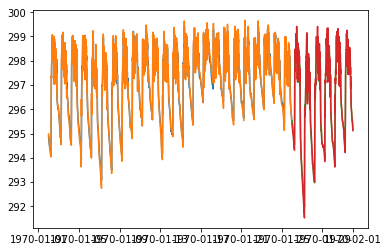

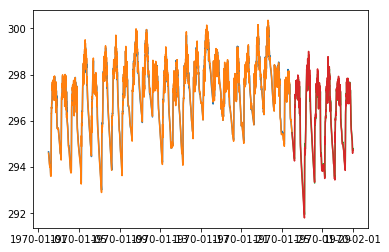

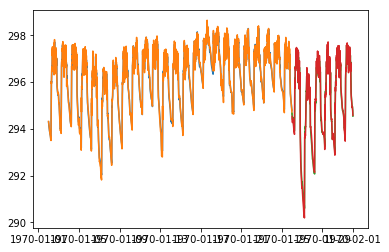

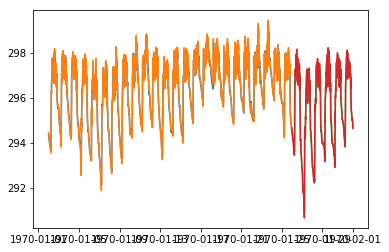

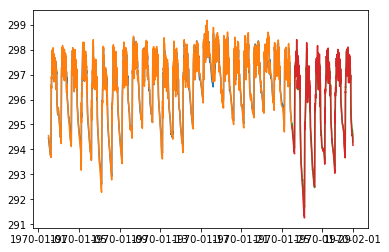

In [29]:
for idx, value in Data_Jan_Resampled.items():
    print('==================',idx,'======================')
    s = ARX_main(dataSetX_All[idx],dataSetY_All[idx],featureSet_No_Colinear[idx])